In [8]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop, Adam
from keras.metrics import Accuracy
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [21]:
def plot_training_history(history):
    """
    Plot training history showing loss/val_loss and accuracy/val_accuracy

    Parameters:
    history: History object returned by model.fit()
    """

    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot 1: Loss and Validation Loss
    ax1.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
    ax1.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
    ax1.set_title('Model Loss', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Accuracy and Validation Accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
    ax2.set_title('Model Accuracy', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print final metrics
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]

    print(f"\nFinal Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")
    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


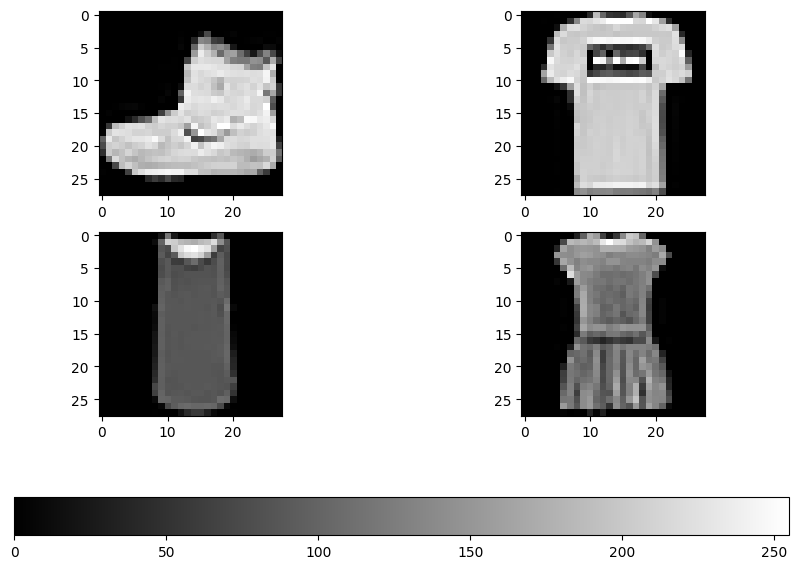

In [10]:
fig , axs = plt.subplots(2,2, figsize=(10,7))
images = []
for ax, data in zip(axs.flat, train_images):
    images.append(ax.imshow(data, cmap='gray'))
fig.colorbar(images[0], ax=axs, orientation= 'horizontal', fraction=.1)

In [11]:
print(f"images shape: {train_images.shape} and label shape: {train_labels.shape}")
print(f"test images shape: {test_images.shape} and test label shape: {test_labels.shape}")

images shape: (60000, 28, 28) and label shape: (60000,)
test images shape: (10000, 28, 28) and test label shape: (10000,)


In [12]:
x_test_reshaped = test_images.reshape(-1,28,28,1)
x_train_reshaped = train_images.reshape(-1,28,28,1)
categorical_test_labels = keras.utils.to_categorical(test_labels)
categorical_train_labels = keras.utils.to_categorical(train_labels)

In [13]:
print(f"images shape: {x_train_reshaped.shape} and label shape: {categorical_train_labels.shape}")
print(f"images shape: {x_test_reshaped.shape} and label shape: {categorical_test_labels.shape}")

images shape: (60000, 28, 28, 1) and label shape: (60000, 10)
images shape: (10000, 28, 28, 1) and label shape: (10000, 10)


In [58]:
simple_conv_model = Sequential()
simple_conv_model.add(keras.Input(shape=(28,28,1)))
simple_conv_model.add(Conv2D(32,(3,3),activation='relu'))
simple_conv_model.add(Conv2D(64,(3,3),activation='relu'))
simple_conv_model.add(MaxPooling2D((2,2)))
simple_conv_model.add(Conv2D(128,(3,3),activation='relu'))
simple_conv_model.add(MaxPooling2D((2,2)))
simple_conv_model.add(Flatten())
simple_conv_model.add(Dense(64,activation='relu'))
simple_conv_model.add(Dropout(0.5))
simple_conv_model.add(Dense(10, activation='softmax'))

simple_conv_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,186 (1.14 MB)

 Trainable params: 298,186 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
simple_conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
history = simple_conv_model.fit(x_train_reshaped,categorical_train_labels, epochs=12, batch_size=100, validation_split=0.2)

Epoch 1/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3082 - loss: 2.2192 - val_accuracy: 0.6927 - val_loss: 0.9416
Epoch 2/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4789 - loss: 1.2910 - val_accuracy: 0.7653 - val_loss: 0.6631
Epoch 3/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6206 - loss: 0.9613 - val_accuracy: 0.7882 - val_loss: 0.5434
Epoch 4/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6988 - loss: 0.7709 - val_accuracy: 0.8114 - val_loss: 0.4849
Epoch 5/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7648 - loss: 0.6111 - val_accuracy: 0.8512 - val_loss: 0.3812
Epoch 6/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8165 - loss: 0.4814 - val_accuracy: 0.8928 - val_loss: 0.3081
Epoch 7/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8388 - loss: 0.4237 - val_accuracy: 0.8960 - val_loss: 0.2895
Epoch 8/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8632 - loss: 0.3722 - val_accuracy: 0

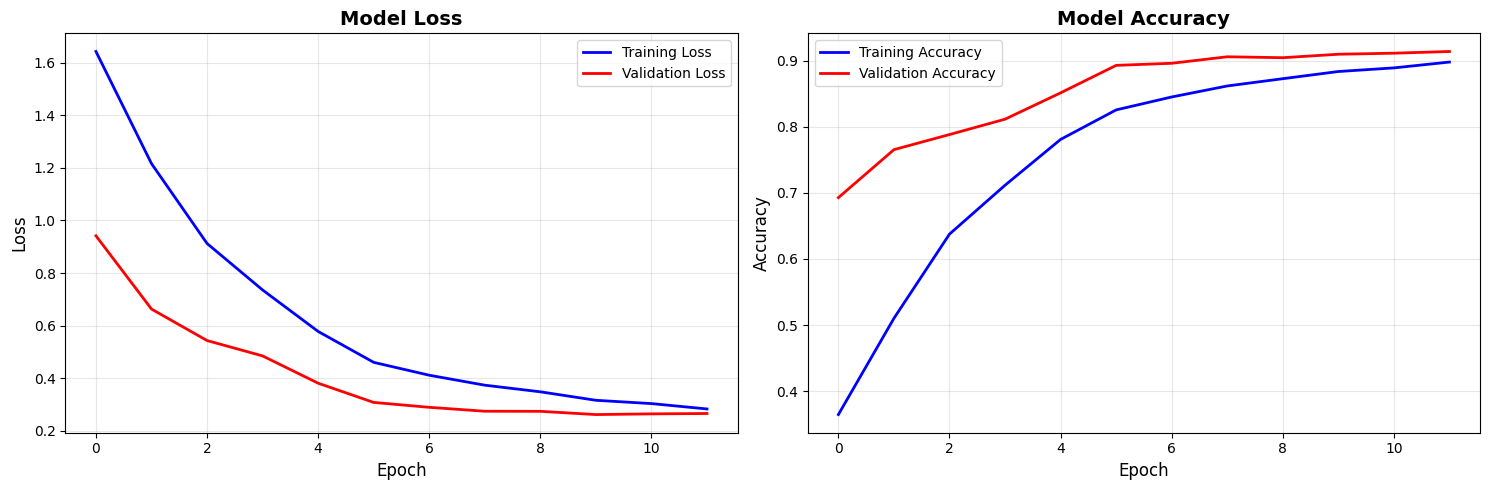


Final Training Loss: 0.2833
Final Validation Loss: 0.2660
Final Training Accuracy: 0.8979
Final Validation Accuracy: 0.9138


In [61]:
plot_training_history(history)

In [62]:
simple_conv_model.evaluate(x_test_reshaped, categorical_test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9110 - loss: 0.2921


[0.28975704312324524, 0.9097999930381775]